<p>Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.</p>


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [133]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485


<p> Hemos hecho una selección de columnas numéricas dentro de las variables predictoras y hemos eliminado la variable respuesta porque la estandarización se aplica únicamente sobre las variables predictoras. </p>

In [134]:
variables_predictoras = df.select_dtypes(include=np.number)
variables_predictoras.drop(['IMDB_Rating', 'Rating_BOX'], axis=1,inplace=True)
variables_predictoras.head(2)

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross
0,1994.0,142,80.0,2343110.0,28341469.0
1,1972.0,175,100.0,1620367.0,134966411.0


In [135]:
variables_predictoras.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,1000.0,1.991221e+03,2.328567e+01,1920.0,1976.00,1.999000e+03,2009.00,2020.0
Runtime,1000.0,1.228910e+02,2.809367e+01,45.0,103.00,1.190000e+02,137.00,321.0
Meta_score,1000.0,7.868839e+01,1.157791e+01,28.0,72.00,8.002396e+01,86.00,100.0
No_of_Votes,1000.0,2.736929e+05,3.273727e+05,25088.0,55526.25,1.385485e+05,374161.25,2343110.0
Gross,1000.0,6.043001e+07,1.015420e+08,1305.0,5012919.25,2.083069e+07,62160005.00,936662225.0


<p>1. Manual </p>

In [136]:
media_meta = variables_predictoras['Meta_score'].mean()
media_votes = variables_predictoras['No_of_Votes'].mean()
media_gross = variables_predictoras['Gross'].mean()
std_meta = variables_predictoras['Meta_score'].std()
std_votes = variables_predictoras['No_of_Votes'].std()
std_gross = variables_predictoras['Gross'].std()

In [137]:
variables_predictoras['Meta_ESTA'] = (variables_predictoras['Meta_score']- media_meta)/std_meta

In [138]:
variables_predictoras['Votes_ESTA'] = (variables_predictoras['No_of_Votes'] - media_votes)/std_votes

In [139]:
variables_predictoras['Gross_ESTA'] = (variables_predictoras['Gross']-media_gross)/std_gross

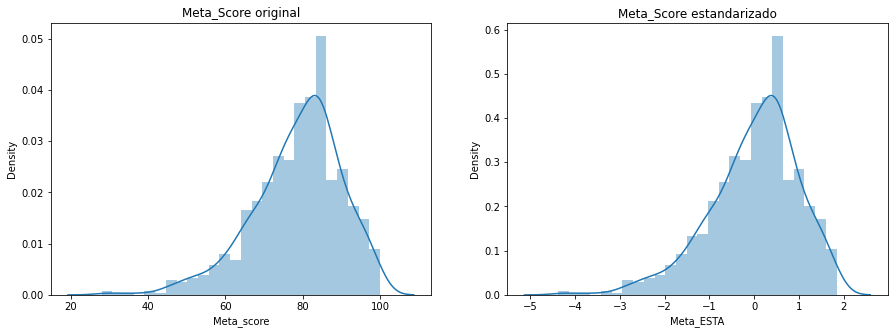

In [140]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Meta_Score original')
axes[1].set_title('Meta_Score estandarizado')

sns.distplot(variables_predictoras['Meta_score'] ,ax = axes[0])
sns.distplot(variables_predictoras['Meta_ESTA'], ax = axes[1]);

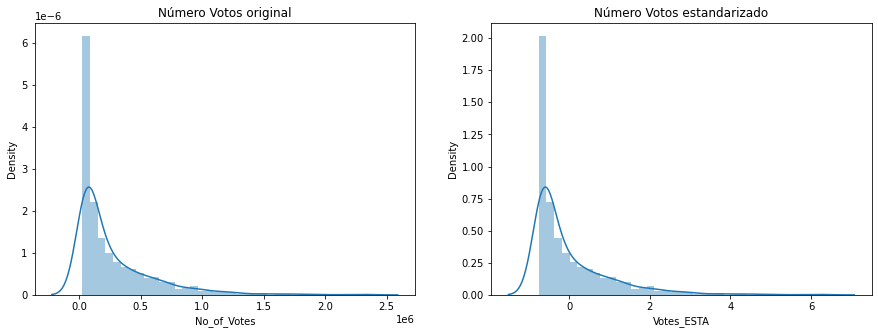

In [141]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Número Votos original')
axes[1].set_title('Número Votos estandarizado')

sns.distplot(variables_predictoras['No_of_Votes'] ,ax = axes[0])
sns.distplot(variables_predictoras['Votes_ESTA'], ax = axes[1]);

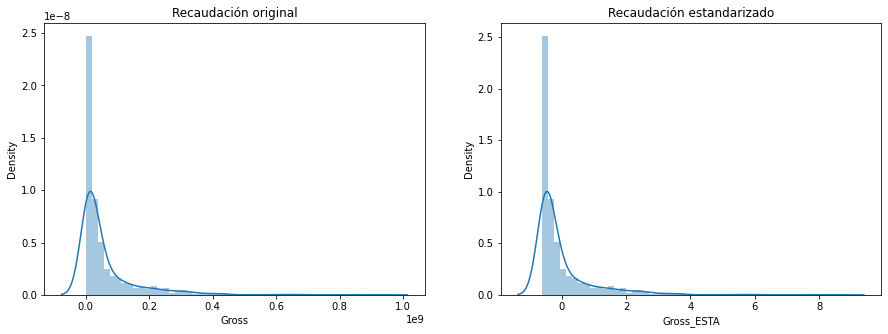

In [142]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Recaudación original')
axes[1].set_title('Recaudación estandarizado')

sns.distplot(variables_predictoras['Gross'] ,ax = axes[0])
sns.distplot(variables_predictoras['Gross_ESTA'], ax = axes[1]);

<p>2.Sklearn Standard Scaler </p>

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

<p> Hemos hecho un subset que es predictoras1 con las variables predictoras quitando la estandarización manual que hemos hecho previamente para realizar la estandarización de Sklearn. Hemos hecho una llamada a la clase como scaler y ahora lo vamos a aplicar a las columnas elegidas. </p>

In [175]:
predictoras1 = variables_predictoras[['Released_Year', 'Runtime','Meta_score','No_of_Votes', 'Gross']]
predictoras1.head(2)

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross
0,1994.0,142,80.0,2343110.0,28341469.0
1,1972.0,175,100.0,1620367.0,134966411.0


In [176]:
X_escaladas = scaler.fit_transform(predictoras1)

In [177]:
predictoras_estandar = pd.DataFrame(X_escaladas)
predictoras_estandar.head(2)

,0,1,2,3,4
0,0.119404,0.680529,0.113342,6.324451,-0.316171
1,-0.825856,1.855759,1.841634,4.115639,0.734412


In [178]:
predictoras_estandar.rename(columns={0: 'Ryr_Sklstd', 1: 'Rnt_Sklstd', 2: "Meta_Sklstd", 3: "Votes_Sklstd", 4: "Gross_Sklstd"}, inplace= True)

In [179]:
predictoras_estandar.head(2)

,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,0.119404,0.680529,0.113342,6.324451,-0.316171
1,-0.825856,1.855759,1.841634,4.115639,0.734412


In [150]:
predictoras_estandar.index

RangeIndex(start=0, stop=1000, step=1)

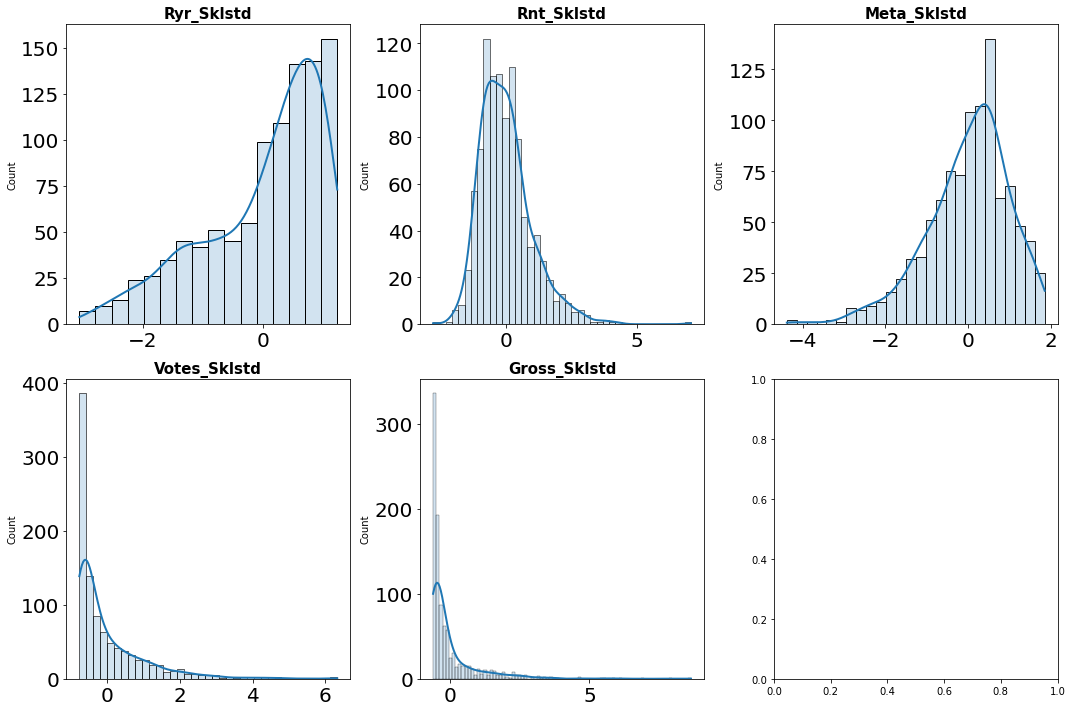

In [180]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

columnas_estandar = predictoras_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = predictoras_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

<p>3.Sklearn Robust Scaler </p>

In [181]:
from sklearn.preprocessing import RobustScaler

In [182]:
robust = RobustScaler()

In [183]:
X_robust = robust.fit_transform(predictoras1)

In [184]:
predictoras_robust = pd.DataFrame(X_robust)
predictoras_robust.head(2)

,0,1,2,3,4
0,-0.151515,0.676471,-0.001712,6.918768,0.131429
1,-0.818182,1.647059,1.426860,4.650520,1.997227


In [185]:
predictoras_robust.rename(columns={0: 'Ryr_Sklstd', 1: 'Rnt_Sklstd', 2: "Meta_Sklstd", 3: "Votes_Sklstd", 4: "Gross_Sklstd"}, inplace= True)

In [186]:
predictoras_robust.head(2)

,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,-0.151515,0.676471,-0.001712,6.918768,0.131429
1,-0.818182,1.647059,1.426860,4.650520,1.997227


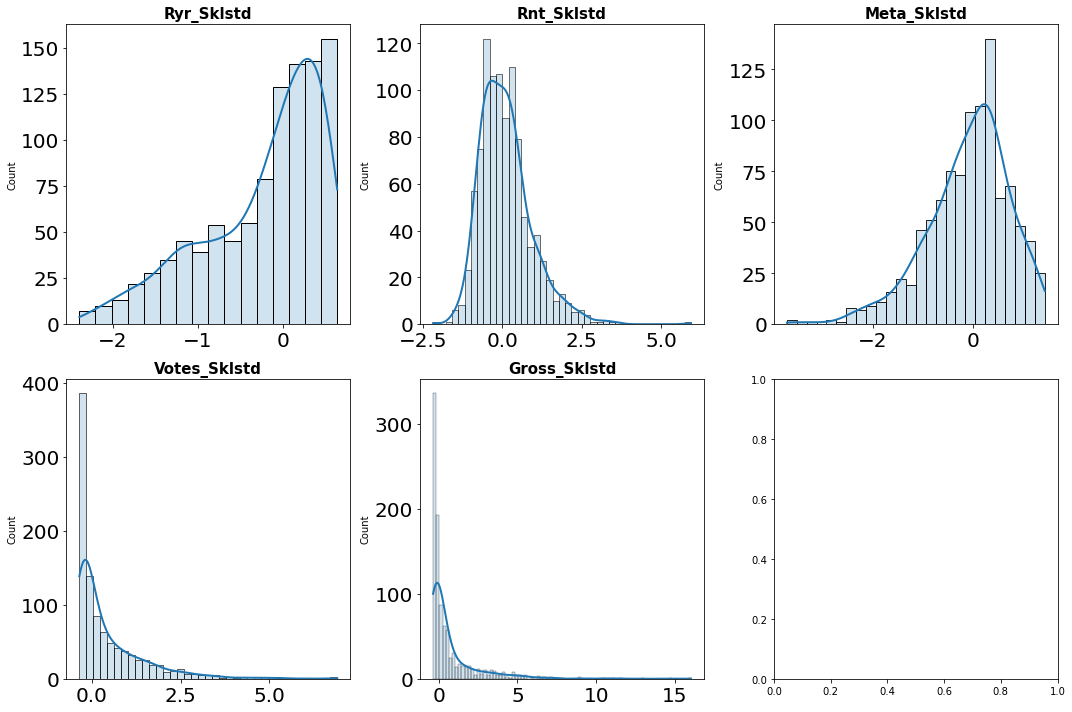

In [187]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

columnas_estandar = predictoras_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = predictoras_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [188]:
df.columns

Index(['Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'No_of_Votes', 'Gross', 'Rating_BOX'],
      dtype='object')

In [160]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [161]:
predictoras_robust.index

RangeIndex(start=0, stop=1000, step=1)

In [162]:
predictoras_robust.shape

(1000, 3)

In [163]:
df.shape

(1000, 9)

In [189]:
predictoras_robust.head(2)

,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,-0.151515,0.676471,-0.001712,6.918768,0.131429
1,-0.818182,1.647059,1.426860,4.650520,1.997227


In [165]:
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485


In [190]:
df_concat = pd.concat([df,predictoras_robust], axis= 1)

In [191]:
df_concat.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227


In [192]:
df_join = df.join(predictoras_robust)

In [193]:
df_join.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227


In [194]:
df_join.isna().sum()

Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
Rating_BOX       0
Ryr_Sklstd       0
Rnt_Sklstd       0
Meta_Sklstd      0
Votes_Sklstd     0
Gross_Sklstd     0
dtype: int64

<p>Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings</p>

In [195]:
df_join.to_pickle("datos/peliculas_limpio.pkl")